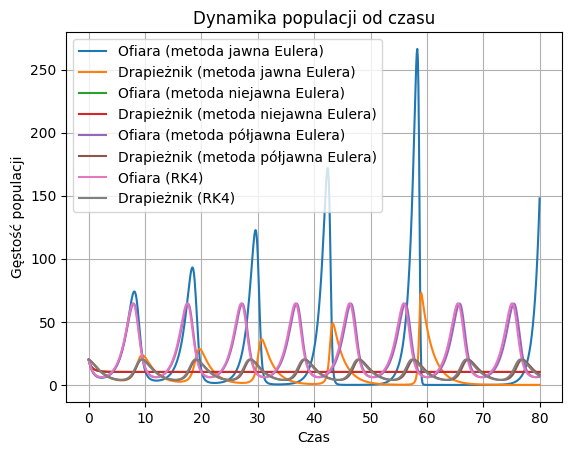

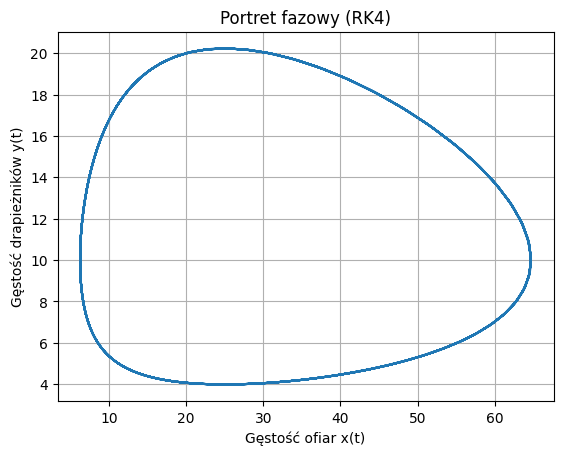

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# parametry
alpha1, beta1 = 1.0, 0.1
alpha2, beta2 = 0.5, 0.02
x0, y0 = 20.0, 20.0
t0, tf, h = 0.0, 80.0, 0.1
N = int((tf - t0) / h)

# funkcje
def f1(x, y): return x * (alpha1 - beta1 * y)
def f2(x, y): return y * (-alpha2 + beta2 * x)

# a)
t = np.linspace(t0, tf, N+1)

sol_exp = np.zeros((N+1, 2))
sol_imp = np.zeros((N+1, 2))
sol_semi = np.zeros((N+1, 2))
sol_rk4 = np.zeros((N+1, 2))

# wartości początkowe
sol_exp[0] = [x0, y0]
sol_imp[0] = [x0, y0]
sol_semi[0] = [x0, y0]
sol_rk4[0] = [x0, y0]

# jawna metoda Eulera
for k in range(N):
    x, y = sol_exp[k]
    sol_exp[k+1] = [x + h*f1(x, y), y + h*f2(x, y)]

# niejawna metoda Eulera
def implicit_step(u_prev):
    def G(u):
        x, y = u
        return [
            x - u_prev[0] - h * f1(x, y),
            y - u_prev[1] - h * f2(x, y)
        ]
    guess = u_prev + h * np.array([f1(*u_prev), f2(*u_prev)])
    u_next, _ = fsolve(G, guess, full_output=False)
    return u_next

for k in range(N):
    sol_imp[k+1] = implicit_step(sol_imp[k])

# półjawna metoda Eulera
for k in range(N):
    x_n, y_n = sol_semi[k]
    denom = 1 - h * (-alpha2 + beta2 * x_n)
    y_np1 = y_n / denom
    x_np1 = x_n + h * f1(x_n, y_np1)
    sol_semi[k+1] = [x_np1, y_np1]

# RK4
for k in range(N):
    x, y = sol_rk4[k]
    k1 = np.array([f1(x, y), f2(x, y)])
    k2 = np.array([f1(x + 0.5*h*k1[0], y + 0.5*h*k1[1]), f2(x + 0.5*h*k1[0], y + 0.5*h*k1[1])])
    k3 = np.array([f1(x + 0.5*h*k2[0], y + 0.5*h*k2[1]), f2(x + 0.5*h*k2[0], y + 0.5*h*k2[1])])
    k4 = np.array([f1(x + h*k3[0], y + h*k3[1]), f2(x + h*k3[0], y + h*k3[1])])
    sol_rk4[k+1] = sol_rk4[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# Plotting time series
plt.figure()
plt.plot(t, sol_exp[:,0], label='Ofiara (metoda jawna Eulera)')
plt.plot(t, sol_exp[:,1], label='Drapieżnik (metoda jawna Eulera)')
plt.plot(t, sol_imp[:,0], label='Ofiara (metoda niejawna Eulera)')
plt.plot(t, sol_imp[:,1], label='Drapieżnik (metoda niejawna Eulera)')
plt.plot(t, sol_semi[:,0], label='Ofiara (metoda półjawna Eulera)')
plt.plot(t, sol_semi[:,1], label='Drapieżnik (metoda półjawna Eulera)')
plt.plot(t, sol_rk4[:,0], label='Ofiara (RK4)')
plt.plot(t, sol_rk4[:,1], label='Drapieżnik (RK4)')
plt.xlabel('Czas')
plt.ylabel('Gęstość populacji')
plt.legend()
plt.title('Dynamika populacji od czasu')
plt.grid(True)
plt.show()

# Phase portrait for RK4 (most accurate)
plt.figure()
plt.plot(sol_rk4[:,0], sol_rk4[:,1])
plt.xlabel('Gęstość ofiar x(t)')
plt.ylabel('Gęstość drapieżników y(t)')
plt.title('Portret fazowy (RK4)')
plt.grid(True)
plt.show()


